Q4001 Thermodynamics of Materials <br>
<b>Homework 5</b> <br>
Osamu Katagiri - A01212611@itesm.mx - CEM <br>

In [2]:
#******************************************************************************#
# Futures
%matplotlib inline
# from __future__ import unicode_literals
# from __future__ import print_function

# Generic/Built-in
import datetime
import argparse

# Other Libs
from IPython.display import display, Image
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

# Owned
# from nostalgia_util import log_utils
# from nostalgia_util import settings_util
__authors__   = ["Osamu Katagiri - A01212611@itesm.mx"]
__copyright__ = "None"
__credits__   = ["Marcelo Videa - mvidea@itesm.mx"]
__license__   = "None"
__status__    = "Under Work"
#******************************************************************************#

## Exercise 1
___

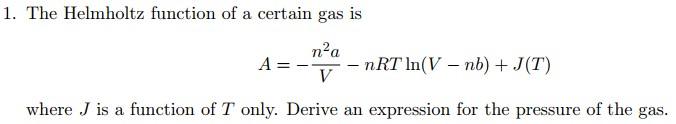

In [6]:
display(Image(filename='./directions/1.jpg'))

## Exercise 2
___

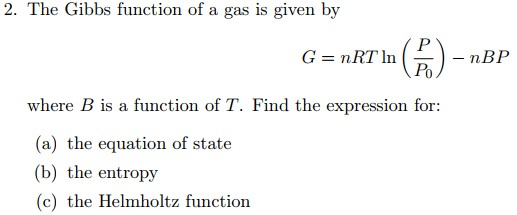

In [10]:
display(Image(filename='./directions/2.jpg'))

## Exercise 3 & 4
___

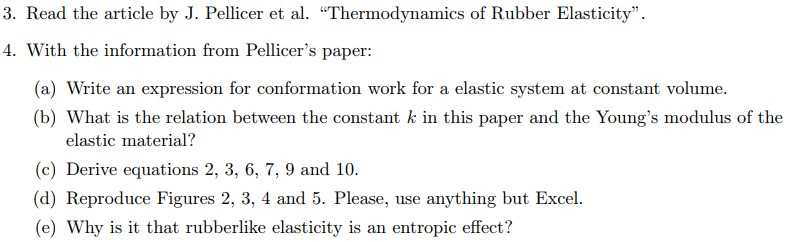

In [8]:
display(Image(filename='./directions/3_4.jpg'))

### Exercise 4 - Part D - Figure 2
___

Solve $L_0$ from eq. (3) in [1]:

$$ {\left(\frac{\partial U}{\partial L}\right)}_{T,V} = \tau + T {\left(\frac{\partial S}{\partial L}\right)}_{T,V} $$
$$ {\left(\frac{\partial U}{\partial L}\right)}_{T,V} = k T^2 {\lambda}_0 \left[\frac{L}{L_0} + 2\left(\frac{L_0}{L}\right)^2\right] $$

* Assuming an ideal elastic system, the derivative ${\left(\frac{\partial U}{\partial L}\right)}_{T,V}$ vanishes [1].
$$ 0 = k T^2 {\lambda}_0 \left[\frac{L}{L_0} + 2\left(\frac{L_0}{L}\right)^2\right] $$
$$ L_0 = \pm \frac{\sqrt{-k^2 \lambda _0^2 L^2 T^4}}{\sqrt{2} k \lambda _0 T^2} $$

* Strain $\alpha_0$
$$ \alpha_0 = \frac{L}{L_0(T_0)} $$

* Coefficient of linear expansion at constant tensile stress and volume ${\lambda}_{\tau,V}$
$$ {\lambda}_{\tau,V} = {\lambda}_0 - \frac{1}{T} \frac{{\left[\frac{L}{L_0(T)}\right]}^3 - 1}{{\left[\frac{L}{L_0(T)}\right]}^3 + 2} $$

* Where: <br>
$\tau = $ stress $[N]$<br>
$T = $ isotropic rubber band temperature $[K]$<br>
$L = $ isotropic rubber band length $[m]$<br>
$L_0 = $ length in the absence of applied stress $[m]$<br>
$\lambda = $ coefficient of linear expansion $[K^{-1}]$<br>
$k = $ sample composition and geometry constant $[N K^{-1}]$<br>
${\alpha}_0 = $ strain of rubber related to its natural length at a reference temperature $T_0$


[1] Pellicer, J., Manzanares, J. A., Zúñiga, J., Utrillas, P., & Fernández, J. (2001). Thermodynamics of Rubber Elasticity. Journal of Chemical Education, 78(2), 263. https://doi.org/10.1021/ed078p263

<module 'matplotlib.pyplot' from 'C:\\Users\\oskat\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

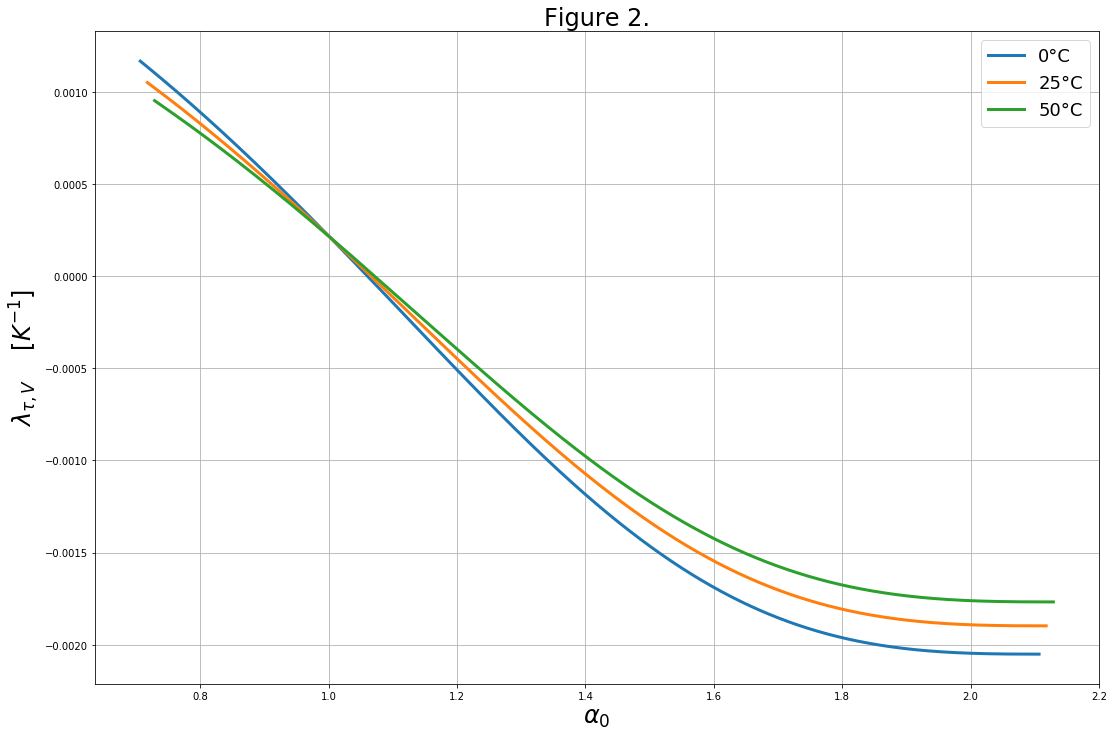

In [56]:
# Function of the length in the absence of applied stress
def L0_(k, Lambda0, L, T):
    nume = ((k**2)*(Lambda0**2)*(L**2)*(T**4))**(1/2);
    deno = ((2**(1/2))*k*Lambda0*(T**2));   
    return nume/deno;

# Function of strain
def alpha_(k, Lambda0, L, T):
    L0 = L0_(k, Lambda0, L, T);
    return L[len(L)-1]/L0;

# Function to compute the coefficient of linear expansion of rubber at constant tensile stress and volume takes
def Lambda_(k, Lambda0, L, T0, T):
    alpha = alpha_(k, Lambda0, L, T);
    return -(Lambda0 - ((((alpha**3) - 1)/(T*((alpha**3) + 2)))));

# find alpha offset
def offset_(alpha, Lambda):
    zeroLambda = min(Lambda, key=lambda x:abs(x-0));
    offset = 0;
    for i in range(len(Lambda)):
        if Lambda[i] == zeroLambda:
            offset = -alpha[i];
    return -alpha - offset*2;

# Draw the plot's workspace
scale = 6;
plt.subplots(figsize=(3*scale, 2*scale));

# Define constants
Lambda0 = 0.00022; #K^(-1)
k = 0.00486; #NK^(-1)
L = np.linspace(0.1, 0.001, 100000);
T0 = 298.15; #K - reference temperature

# Plot
T = 273.15; #K
Lambda = Lambda_(k, Lambda0, L, T0, T);
alpha = alpha_(k, Lambda0, L, T0);
alpha = offset_(alpha, Lambda);
plt.plot(alpha, Lambda, '-', linewidth=3, label='0°C');

T = 298.15; #K
Lambda = Lambda_(k, Lambda0, L, T0, T);
alpha = alpha_(k, Lambda0, L, T0);
alpha = offset_(alpha, Lambda);
plt.plot(alpha, Lambda, '-', linewidth=3, label='25°C');

T = 323.15; #K
Lambda = Lambda_(k, Lambda0, L, T0, T);
alpha = alpha_(k, Lambda0, L, T0);
alpha = offset_(alpha, Lambda);
plt.plot(alpha, Lambda, '-', linewidth=3, label='50°C');

# Display plots
plt.xlabel(r'${\alpha}_0$', fontsize=24);
plt.ylabel(r'$\lambda_{\tau , V}$' + '    ' + r'$[K^{-1}]$', fontsize=24);
plt.title("Figure 2.", size=24)
plt.legend(prop={'size': 18})
plt.grid()
display(plt);

### Exercise 4 - Part D - Figure 3
___

<module 'matplotlib.pyplot' from 'C:\\Users\\oskat\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

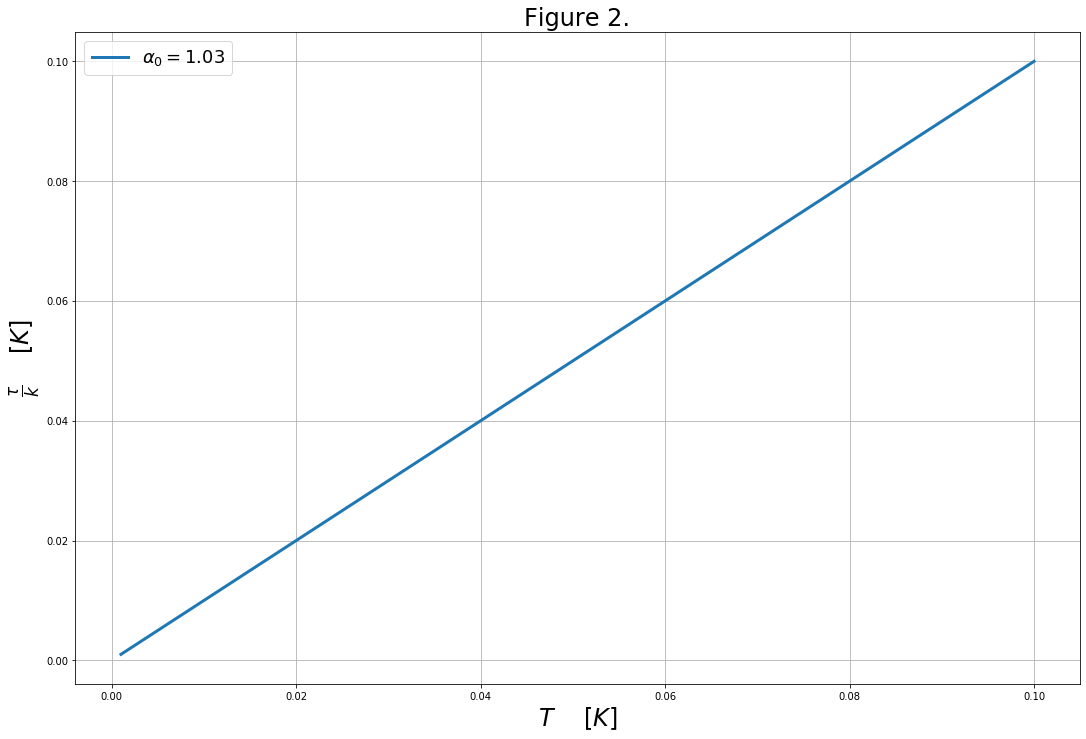

In [57]:
# Function of the length in the absence of applied stress
def L0_(k, Lambda0, L, T):
    nume = ((k**2)*(Lambda0**2)*(L**2)*(T**4))**(1/2);
    deno = ((2**(1/2))*k*Lambda0*(T**2));   
    return nume/deno;

# Function of strain
def alpha_(k, Lambda0, L, T):
    L0 = L0_(k, Lambda0, L, T);
    return L[len(L)-1]/L0;

# Function to compute the coefficient of linear expansion of rubber at constant tensile stress and volume takes
def Lambda_(k, Lambda0, L, T0, T):
    alpha = alpha_(k, Lambda0, L, T);
    return -(Lambda0 - ((((alpha**3) - 1)/(T*((alpha**3) + 2)))));

# find alpha offset
def offset_(alpha, Lambda):
    zeroLambda = min(Lambda, key=lambda x:abs(x-0));
    offset = 0;
    for i in range(len(Lambda)):
        if Lambda[i] == zeroLambda:
            offset = -alpha[i];
    return -alpha - offset*2;

# Draw the plot's workspace
scale = 6;
plt.subplots(figsize=(3*scale, 2*scale));

# Define constants
T = np.linspace(0.1, 0.001, 100000);

# Plot
alpha_0 = 1.03;
plt.plot(T, np.linspace(0.1, 0.001, 100000), '-', linewidth=3, label=r'$\alpha_0 = 1.03$');

# Display plots
plt.xlabel(r'$T$' + '    ' + r'$[K]$', fontsize=24);
plt.ylabel(r'$\frac{\tau}{k}$' + '    ' + r'$[K]$', fontsize=24);
plt.title("Figure 2.", size=24)
plt.legend(prop={'size': 18})
plt.grid()
display(plt);

### Exercise 4 - Part D - Figure 4
___

### Exercise 4 - Part D - Figure 5
___

## Exercise 5
___

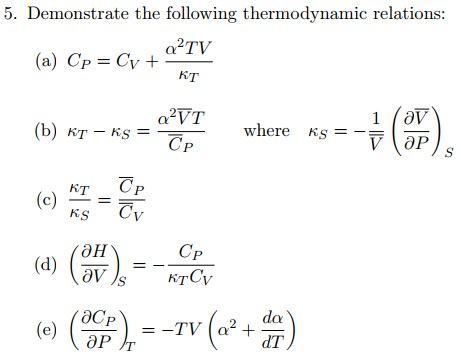

In [9]:
display(Image(filename='./directions/5.jpg'))